### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

* 函数调用说明 numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [2]:
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    return np.sin(4*2*np.pi*x)
    #return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 调整数据点数，进行测试
#x = np.linspace(0, 1, 10)
#x = np.linspace(0, 1, 100)
x = np.linspace(0, 1, 200)

x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值——在几个噪声方差上进行测试
y_ = real_func(x)
#y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
y = [np.random.normal(0, 0.2) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.3) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.5) + y1 for y1 in y_]



def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M=10

Fitting Parameters: [-6.67814635e+03  1.00648512e+05 -3.73682293e+05  6.55966332e+05
 -6.50178606e+05  3.87588932e+05 -1.40097291e+05  2.95781277e+04
 -3.29372154e+03  1.49925247e+02 -9.02884346e-01]


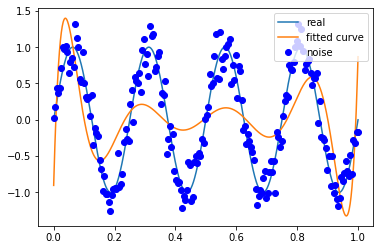

In [4]:
# M=10
p_lsq_0 = fitting(M=10)

### M=30

Fitting Parameters: [-5.96136491e+04  2.99917900e+05 -4.67776393e+04  7.98384244e+05
 -2.74454436e+06 -1.24619877e+06  4.75515607e+06  5.28942494e+05
 -2.76903048e+05 -2.23907282e+06 -3.32155910e+05 -2.41775613e+06
  9.95143659e+05  2.22986522e+06  2.06984829e+06  6.47825559e+05
 -2.33515617e+06 -2.82885386e+06 -1.53146392e+06  4.88444753e+06
  2.03988634e+06 -3.34528115e+06 -2.41852720e+06  4.14905038e+06
 -1.88300006e+06  2.97550066e+05  1.80454915e+04 -9.34742185e+03
  5.82142216e+02  6.49159818e+00  1.90553327e-01]


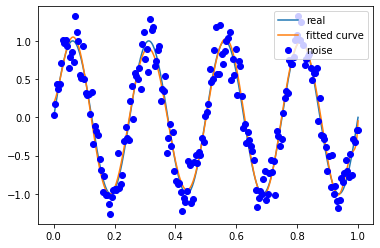

In [5]:
# M=30
p_lsq_1 = fitting(M=30)

### M=50

Fitting Parameters: [-4.85798793e+05  1.54828038e+06 -4.87773558e+05 -4.57439550e+05
 -1.13129101e+06 -2.46976058e+05  1.95706434e+05  1.02638092e+06
  8.47175093e+05 -2.51209262e+05  4.39332532e+05  1.38798857e+05
  1.44500855e+05 -1.27347936e+06 -1.35283725e+06 -1.50301555e+05
  1.17292143e+06  3.05098107e+05 -2.38586121e+05 -3.30844629e+05
  6.31821885e+05  1.59837177e+04  7.68440226e+03  8.23729387e+05
 -1.95843068e+02  1.31168745e+05 -4.30221369e+05 -1.16954237e+06
 -3.66104084e+05 -1.30894324e+05  2.53893594e+04  4.71599944e+05
  1.04078016e+06  7.88742836e+05  5.03538274e+05 -1.27697699e+06
 -1.70876210e+06 -7.36247960e+04  7.07264990e+05  1.29381265e+06
  4.12170122e+05 -1.16894766e+06 -8.29016239e+05  1.15091550e+06
 -8.96816473e+04 -2.78789212e+05  1.26307028e+05 -2.10463517e+04
  1.24542496e+03 -9.29553451e+00  2.71906638e-01]


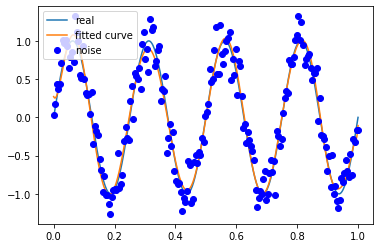

In [6]:
# M=50
p_lsq_3 = fitting(M=50)

### M=180

Fitting Parameters: [ 5.16432747e+04  2.23046183e+04 -1.88831270e+04  1.26960815e+03
 -2.74908623e+04 -7.93346112e+04  2.46784609e+04  9.78508120e+03
  3.59437046e+03  3.90367093e+04 -2.76461998e+04  1.76442900e+04
 -1.17683252e+05 -4.74756741e+04  2.64252945e+04 -5.49772274e+04
  5.95703554e+04  3.06188293e+03  6.58297049e+03 -1.41127013e+04
  4.61094661e+04  2.89677394e+04  2.11645193e+04  2.01184741e+04
 -2.99768430e+04 -2.81149213e+04  8.83131737e+04 -7.36500708e+04
  1.00414316e+05  3.14402248e+04  2.51088731e+04  4.59166783e+04
 -9.44012106e+03  1.66898163e+04  7.34711990e+04 -2.53580537e+04
 -2.09089741e+04 -8.86306165e+04  3.74410503e+04  1.10948506e+05
 -3.31413410e+04 -6.56785427e+04  1.05877456e+05  1.33578910e+04
 -3.57904582e+04 -3.22530523e+04 -1.92769615e+04 -1.08391780e+05
 -2.97160758e+04 -6.73033476e+04 -1.64802056e+04 -9.25911048e+04
 -1.73935258e+04 -1.66388100e+05  1.99200882e+04  7.33369986e+04
 -3.76321610e+03 -4.70195313e+04 -3.53876353e+04 -3.60390502e+04
  3.2

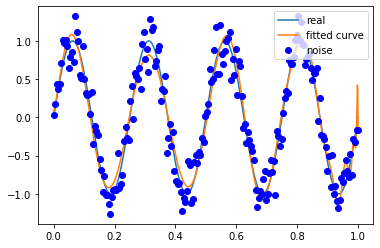

In [7]:
# M=180
p_lsq_9 = fitting(M=180)

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [8]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [9]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

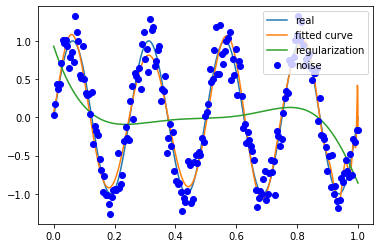

In [10]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()